[-5.91603618e-01 -7.92379253e-01  1.55816534e+00 -1.60949328e+00
 -4.20242025e-01  1.76864698e+00  2.37092288e-02 -1.50510904e+00
  6.03334086e-02 -1.86236344e+00  7.43201675e-01  3.37646365e-01
 -1.21896040e+00 -5.33471454e-01 -1.71724114e+00  1.60122354e-02
  8.92165862e-01  6.57545355e-01 -1.78919861e+00  1.52386827e+00
 -8.07101988e-01  2.13412618e+00  5.72236163e-01 -1.14509738e+00
  3.63189002e-02  2.63750649e-01 -7.65464836e-01  2.54825019e-02
  3.06757629e-01 -4.01050798e-01 -2.37367772e-01 -1.88496867e-01
 -1.46347008e+00  7.21763374e-01  6.01159129e-01  1.89116754e+00
  1.18727574e+00 -2.35875832e-02 -4.38121196e-01  1.01671777e-01
 -1.18386679e+00 -6.07046205e-01  2.09809979e-01  4.60834827e-01
  6.89866965e-01  1.89501599e-01 -2.74491049e-01  3.01878247e-01
  1.44281908e+00  4.37710754e-01 -4.75666008e-02  1.84589571e+00
 -8.86503328e-01 -2.19300464e+00  6.75277365e-02 -4.56764810e-01
 -1.26518314e-01  3.24065710e-01 -4.75146902e-01  6.85613958e-01
  9.76395036e-01 -5.24862

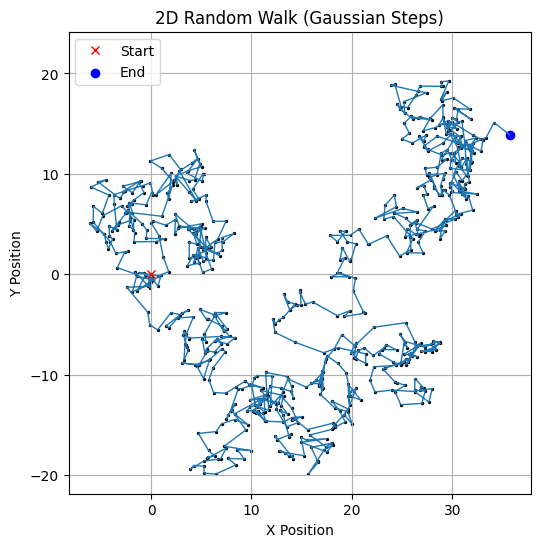

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps = 725   # number of steps in the walk
mean = 0               # mean of Gaussian distribution
std_dev = 1            # standard deviation of Gaussian distribution.............. this is the initial velocity


# Generate Gaussian random steps for x and y directions
steps_x = np.random.normal(mean, std_dev, num_steps)
steps_y = np.random.normal(mean, std_dev, num_steps)

# Cumulative sum gives the random walk positions
x_positions = np.cumsum(steps_x)
y_positions = np.cumsum(steps_y)

# starting point (0,0)
x_positions = np.insert(x_positions, 0, 0)
y_positions = np.insert(y_positions, 0, 0)

# Plot
plt.figure(figsize=(8,6))
plt.plot(x_positions, y_positions, lw=1, markersize=0.02)
plt.scatter(x_positions, y_positions, c='black', s=2)  # all points
plt.plot(0, 0, 'rx', label='Start')     # starting point
plt.scatter(x_positions[-1], y_positions[-1], c='blue', label='End')  # ending point
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("2D Random Walk (Gaussian Steps)")
plt.axis("square")
plt.legend()
plt.grid()
#lt.savefig("/Users/conorkirby/projects/python/capstone/Figures/Gaussian_rand_walk.png", dpi=300)
plt.show()

In [2]:
#mean squared displacement to check if slope is right 
#

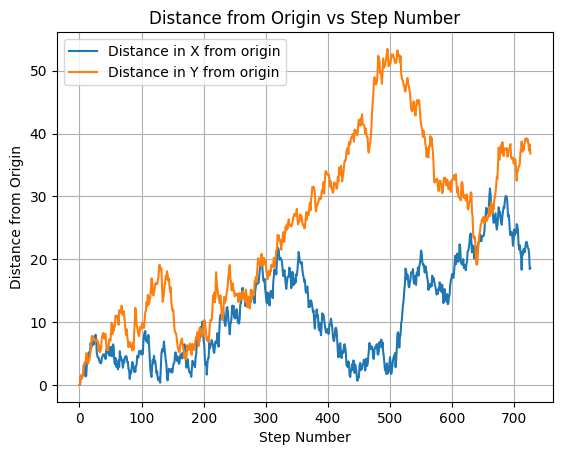

In [3]:
# Distance from origin vs step number
# starting point (0,0) not the first step in each array
x_positions = np.insert(x_positions, 0, 0)
y_positions = np.insert(y_positions, 0, 0)

# Distances from origin along each axis
dist_x = np.abs(x_positions)
dist_y = np.abs(y_positions)

# Plot both on same figure
plt.plot(dist_x, label="Distance in X from origin")
plt.plot(dist_y, label="Distance in Y from origin")
plt.legend()
plt.xlabel("Step Number")
plt.ylabel("Distance from Origin")
plt.title("Distance from Origin vs Step Number")
plt.grid()
#plt.savefig("/Users/conorkirby/Vscode/Capstone/Figures/Distance_from_Origin.png", dpi=300)
plt.show()

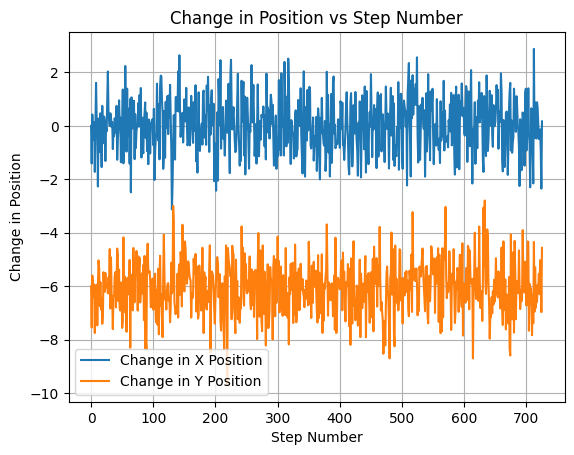

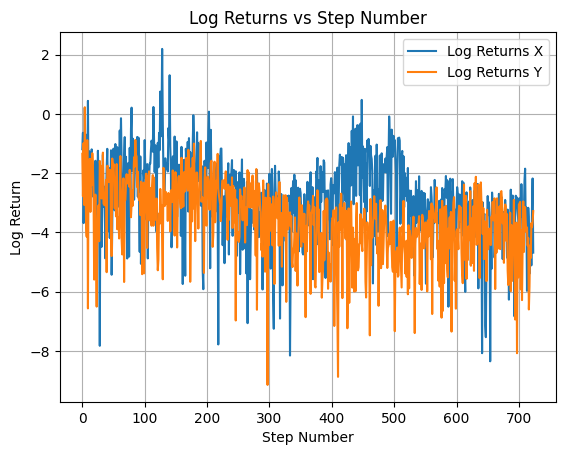

In [4]:
# Changes in position, x and y separately

changes_x = np.diff(x_positions)
changes_y = np.diff(y_positions) - 6 # to shift y changes down for better visibility

plt.plot(changes_x, label="Change in X Position")
plt.plot(changes_y, label="Change in Y Position")
plt.legend()
plt.xlabel("Step Number")
plt.ylabel("Change in Position")
plt.title("Change in Position vs Step Number")
plt.grid()
#plt.savefig("/Users/conorkirby/Vscode/Capstone/Figures/Change_in_Position.png", dpi=300)
plt.show()

# Calculate log returns using a for loop
log_returns_x = []
log_returns_y = []

for i in range(len(x_positions) - 1):
    if x_positions[i] != 0:
        log_returns_x.append(np.log(np.abs(np.diff(x_positions)[i]) / np.abs(x_positions[i])))
    if y_positions[i] != 0:
        log_returns_y.append(np.log(np.abs(np.diff(y_positions)[i]) / np.abs(y_positions[i])))

log_returns_x = np.array(log_returns_x)
log_returns_y = np.array(log_returns_y)


plt.plot(log_returns_x, label="Log Returns X")
plt.plot(log_returns_y, label="Log Returns Y")
plt.legend()
plt.xlabel("Step Number")
plt.ylabel("Log Return")
plt.title("Log Returns vs Step Number")
plt.grid()
plt.show()

do histogram follow document

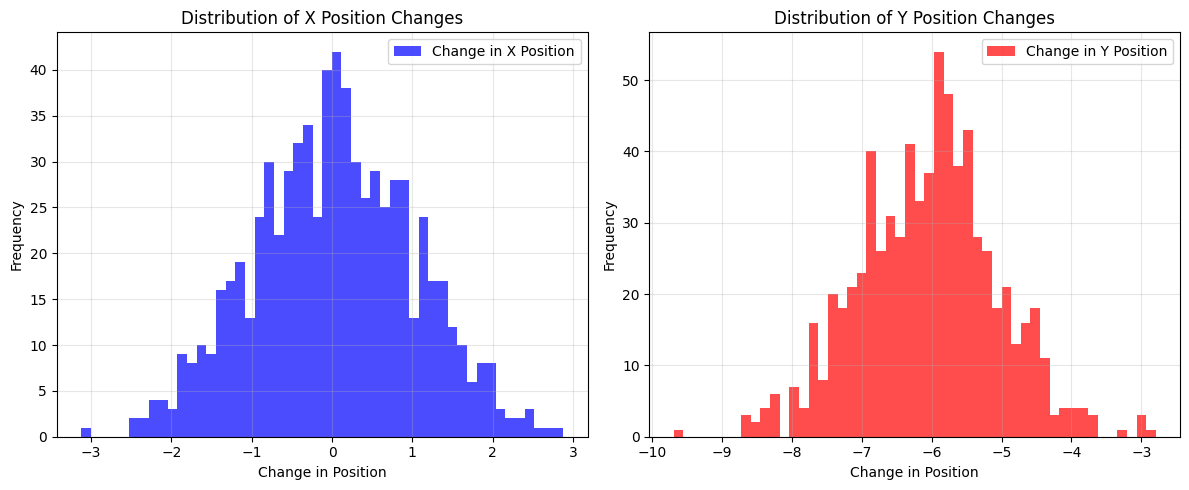

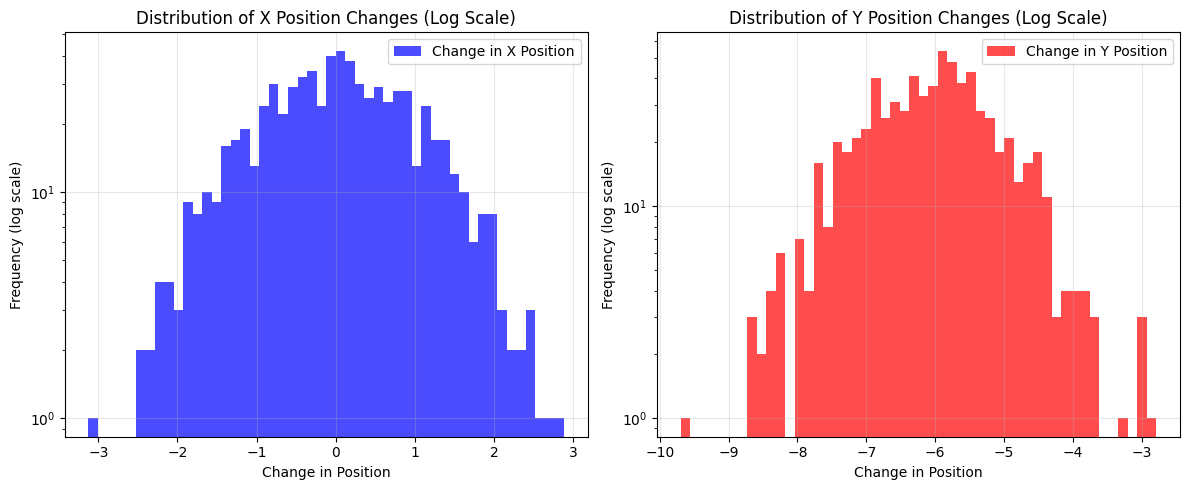

In [5]:
# Histogram of changes in x positions and y positions separately
# side by side plots

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(changes_x, bins=50, alpha=0.7, label="Change in X Position", color='blue')
plt.xlabel("Change in Position")
plt.ylabel("Frequency")
plt.title("Distribution of X Position Changes")
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(changes_y, bins=50, alpha=0.7, label="Change in Y Position", color='red')
plt.xlabel("Change in Position")
plt.ylabel("Frequency")
plt.title("Distribution of Y Position Changes")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
#plt.savefig("/Users/conorkirby/Vscode/Capstone/Figures/Histogram_Changes_in_Position.png", dpi=300)
plt.show()

# vertical axis log plot of changes in position
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(changes_x, bins=50, alpha=0.7, label="Change in X Position", log=True, color='blue')
plt.xlabel("Change in Position")
plt.ylabel("Frequency (log scale)")
plt.title("Distribution of X Position Changes (Log Scale)")
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(changes_y, bins=50, alpha=0.7, label="Change in Y Position", log=True, color='red')
plt.xlabel("Change in Position")
plt.ylabel("Frequency (log scale)")
plt.title("Distribution of Y Position Changes (Log Scale)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
#plt.savefig("/Users/conorkirby/Vscode/Capstone/Figures/Histogram_Changes_in_Position_Log.png", dpi=300)
plt.show()


# worth plotting a theoretical gaussian over the histogram for reference#

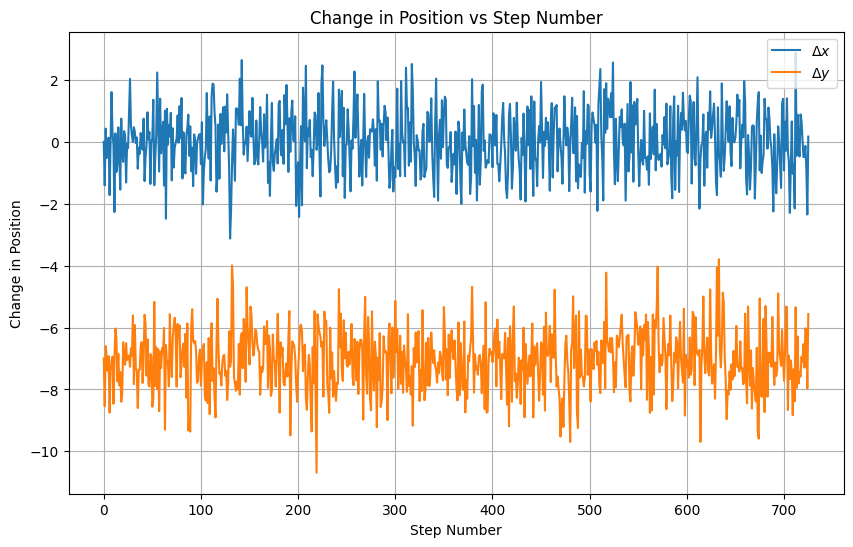

/var/folders/l1/x0797x3512d9sktcpm47npbh0000gn/T/ipykernel_1018/3839821867.py:14: RuntimeWarning: divide by zero encountered in divide
  log_returns_x = np.log(x_positions[1:] / x_positions[:-1])
/var/folders/l1/x0797x3512d9sktcpm47npbh0000gn/T/ipykernel_1018/3839821867.py:14: RuntimeWarning: invalid value encountered in divide
  log_returns_x = np.log(x_positions[1:] / x_positions[:-1])
/var/folders/l1/x0797x3512d9sktcpm47npbh0000gn/T/ipykernel_1018/3839821867.py:14: RuntimeWarning: invalid value encountered in log
  log_returns_x = np.log(x_positions[1:] / x_positions[:-1])
/var/folders/l1/x0797x3512d9sktcpm47npbh0000gn/T/ipykernel_1018/3839821867.py:15: RuntimeWarning: divide by zero encountered in divide
  log_returns_y = np.log(y_positions[1:] / y_positions[:-1])
/var/folders/l1/x0797x3512d9sktcpm47npbh0000gn/T/ipykernel_1018/3839821867.py:15: RuntimeWarning: invalid value encountered in divide
  log_returns_y = np.log(y_positions[1:] / y_positions[:-1])
/var/folders/l1/x0797x3512

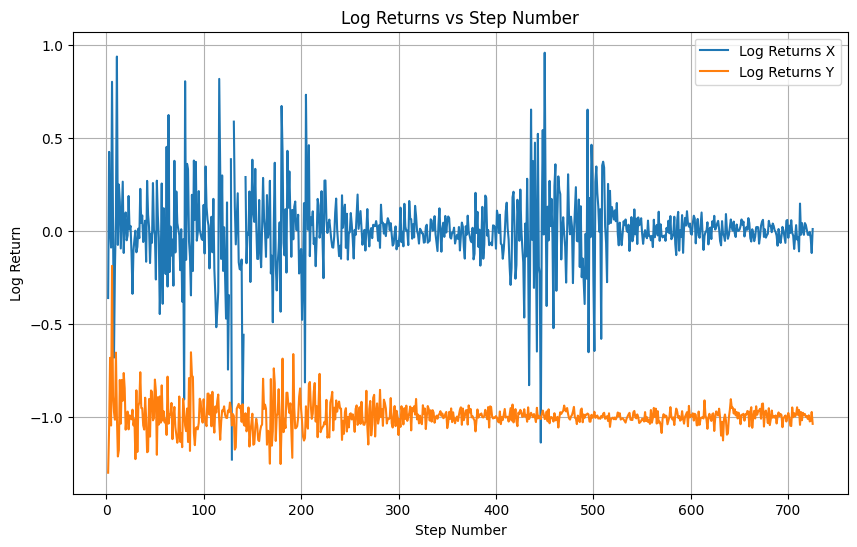

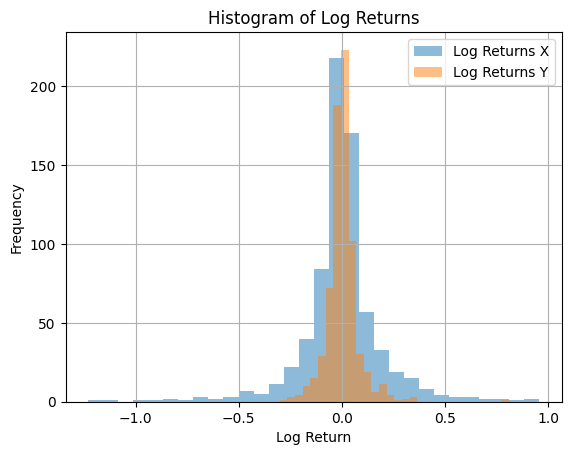

In [6]:
# changes in position plot no log returns
plt.figure(figsize=(10, 6))
plt.plot(changes_x, label="$\Delta x$")
plt.plot(changes_y - 1, label="$\Delta y$")
plt.legend(loc='upper right')
plt.xlabel("Step Number")
plt.ylabel("Change in Position")
plt.title("Change in Position vs Step Number")
plt.grid()
#plt.savefig("/Users/conorkirby/Vscode/Capstone/Figures/Change_in_Position.png", dpi=300)
plt.show()

# log returns
log_returns_x = np.log(x_positions[1:] / x_positions[:-1])
log_returns_y = np.log(y_positions[1:] / y_positions[:-1])

# plot as a function of time step
plt.figure(figsize=(10, 6))
plt.plot(log_returns_x, label="Log Returns X")
plt.plot(log_returns_y - 1, label="Log Returns Y")
plt.legend()
plt.xlabel("Step Number")
plt.ylabel("Log Return")
plt.title("Log Returns vs Step Number")
plt.grid()
#plt.savefig("/Users/conorkirby/Vscode/Capstone/Figures/Log
plt.show()

# Filter out non-finite values for histogram
finite_log_returns_x = log_returns_x[np.isfinite(log_returns_x)]
finite_log_returns_y = log_returns_y[np.isfinite(log_returns_y)]

plt.hist(finite_log_returns_x, bins=30, alpha=0.5, label="Log Returns X")
plt.hist(finite_log_returns_y, bins=30, alpha=0.5, label="Log Returns Y")
plt.legend()
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.title("Histogram of Log Returns")
plt.grid()
#plt.savefig("/Users/conorkirby/Vscode/Capstone/Figures/Log_Returns_Histogram.png", dpi=300)
plt.show()

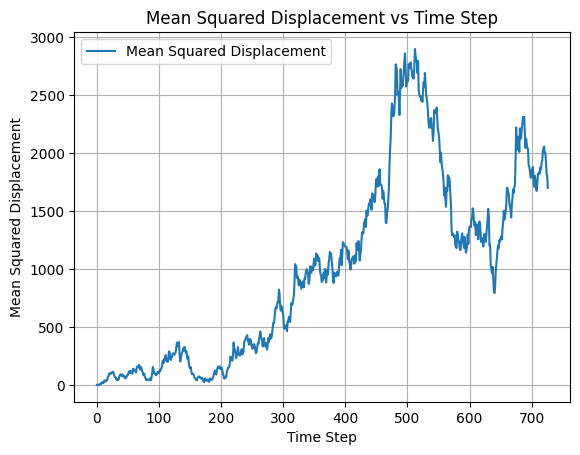

In [7]:
# plotting the mean squared displacement to check for linear relation
plt.plot(np.arange(len(x_positions)), x_positions**2 + y_positions**2, label="Mean Squared Displacement")
plt.grid()
plt.xlabel("Time Step")
plt.ylabel("Mean Squared Displacement")
plt.title("Mean Squared Displacement vs Time Step")
plt.legend()
#plt.savefig("/Users/conorkirby/projects/python/Capstone/Figures/GaussianMSD_onerun.png", dpi=300)
plt.show()

# Why isn't the MSD linear for one run?
# For a single random walk, the MSD looks jagged because each trajectory
# is stochastic: sometimes steps reinforce each other, sometimes they cancel.
# The theoretical MSD ~ 2 * D * t is only exact after averaging over many
# independent walks (ensemble average). For one walk, we just see noisy
# fluctuations around that linear trend.


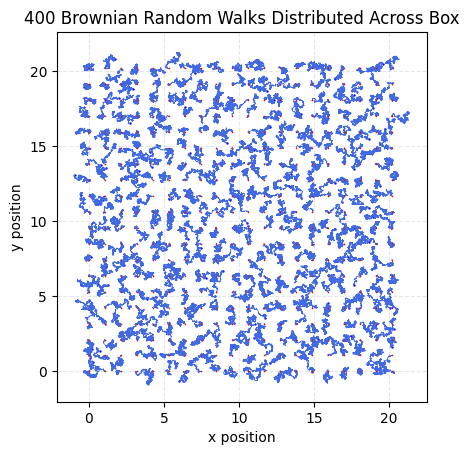

Slope of averaged MSD: 0.0008707783261086686
Slope of averaged MSD: 0.0007353207082600139


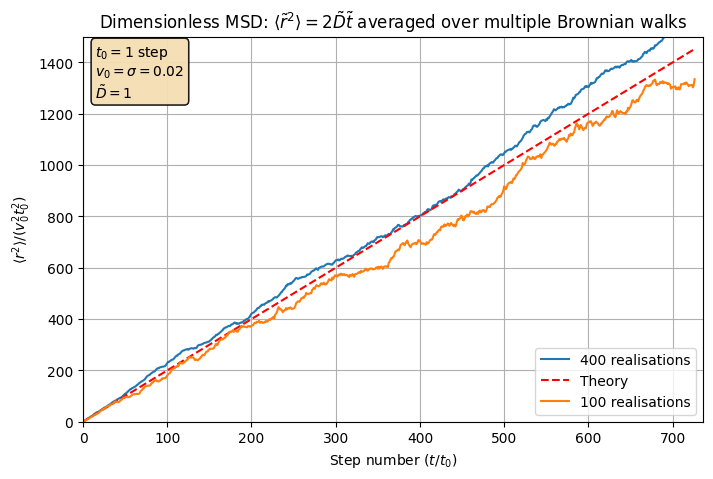

In [3]:
# Need to run for multiple gaussian walks and average the MSD to see linear trend

# Parameters
num_steps = 726
num_walks = 400
std_dev = 0.02 # worth noting it is too random to analyse properly with std_dev over 0.5
box_size = 20.203051
scale = 0.5 # scaling for start and end points

# Store squared displacements
squared_displacements = np.zeros((num_walks, num_steps+1))

grid_size = int(np.sqrt(num_walks))                 # 20 x 20 grid = 400 walks
x_grid = np.linspace(0, box_size, grid_size)
y_grid = np.linspace(0, box_size, grid_size)
start_positions = np.array([(x, y) for x in x_grid for y in y_grid])

for w in range(num_walks):
    steps_x = np.random.normal(0, std_dev, num_steps) # when choosing these steps we are in tern choosing velocities
    steps_y = np.random.normal(0, std_dev, num_steps)

    x_positions = np.insert(np.cumsum(steps_x), 0, 0)
    y_positions = np.insert(np.cumsum(steps_y), 0, 0)

    squared_displacements[w] = x_positions**2 + y_positions**2

    x_positions += start_positions[w, 0]
    y_positions += start_positions[w, 1]

    plt.plot(x_positions, y_positions, linewidth=0.5, alpha=1, color='royalblue')
    plt.plot(start_positions[w, 0], start_positions[w, 1], 'rx', label='Start', markersize=scale)     # starting point
    plt.scatter(x_positions[-1], y_positions[-1], c='blue', label='End', s=scale)  # ending point



#plt.gca().set_aspect('equal', adjustable='box')
plt.axis("square")
""" plt.xlim(0.7, 2.1)
plt.ylim(0.3, 1.7) """
plt.title("400 Brownian Random Walks Distributed Across Box")
plt.xlabel("x position")
plt.ylabel("y position")
plt.grid(True, linestyle='--', alpha=0.3)
#plt.savefig("/Users/conorkirby/projects/python/Capstone/Figures/Gaussian_400_SingleRandomWalk.png", dpi=300)
plt.show()

# Average over walks
msd = squared_displacements.mean(axis=0)
slope = (msd[-1] - msd[0]) / (num_steps - 0)
print(f"Slope of averaged MSD: {slope}")


plt.figure(figsize=(8, 5))
plt.plot(msd/std_dev**2, label=r"400 realisations")            # msd/(v0**2 t0**2)
# plot a line with slope 2
plt.plot(np.arange(len(msd)), 2 * (std_dev**2) * np.arange(len(msd))/ (std_dev**2), 'r--', label=r"Theory")  # slope 2 line
plt.xlabel(r"Step number ($t/t_0$)")
plt.ylabel(r"$\langle r^2 \rangle / (v_0^2 t_0^2)$")       # t0 = 1 step, v0 = std_dev
plt.title(r"Dimensionless MSD: $\langle \tilde{r}^2 \rangle = 2 \tilde{D} \tilde{t}$ averaged over multiple Brownian walks")
# text box with parameter definitions
plt.text(0.02, 0.98, r'$t_0 = 1$ step' + '\n' + r'$v_0 = \sigma = $' + f'{std_dev}' + '\n' + r'$\tilde{D} = 1$', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
plt.legend()
plt.grid()
""" plt.xlim(0, num_steps+10)
plt.ylim(0, 1500) """
#plt.savefig("/Users/conorkirby/Vscode/Capstone/Figures/MSD_linear.png", dpi=300)





num_steps = 726
num_walks = 100
std_dev = 0.02 # worth noting it is too random to analyse properly with std_dev over 0.5
box_size = 20.203051
scale = 5 # scaling for start and end points

# Store squared displacements
squared_displacements = np.zeros((num_walks, num_steps+1))

grid_size = int(np.sqrt(num_walks))                 # 20 x 20 grid = 400 walks
x_grid = np.linspace(0, box_size, grid_size)
y_grid = np.linspace(0, box_size, grid_size)
start_positions = np.array([(x, y) for x in x_grid for y in y_grid])

for w in range(num_walks):
    steps_x = np.random.normal(0, std_dev, num_steps) # when choosing these steps we are in tern choosing velocities
    steps_y = np.random.normal(0, std_dev, num_steps)

    x_positions = np.insert(np.cumsum(steps_x), 0, 0)
    y_positions = np.insert(np.cumsum(steps_y), 0, 0)

    squared_displacements[w] = x_positions**2 + y_positions**2

    x_positions += start_positions[w, 0]
    y_positions += start_positions[w, 1]



#plt.gca().set_aspect('equal', adjustable='box')

# Average over walks
msd = squared_displacements.mean(axis=0)
slope = (msd[-1] - msd[0]) / (num_steps - 0)
print(f"Slope of averaged MSD: {slope}")


plt.plot(msd/std_dev**2, label=r"100 realisations")            # msd/(v0**2 t0**2)
plt.xlabel(r"Step number ($t/t_0$)")
plt.ylabel(r"$\langle r^2 \rangle / (v_0^2 t_0^2)$")       # t0 = 1 step, v0 = std_dev
plt.title(r"Dimensionless MSD: $\langle \tilde{r}^2 \rangle = 2 \tilde{D} \tilde{t}$ averaged over multiple Brownian walks")
# text box with parameter definitions
plt.text(0.02, 0.98, r'$t_0 = 1$ step' + '\n' + r'$v_0 = \sigma = $' + f'{std_dev}' + '\n' + r'$\tilde{D} = 1$', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.grid()
plt.xlim(0, num_steps+10)
plt.ylim(0, 1500)
plt.legend()
plt.grid()
#plt.savefig("/Users/conorkirby/projects/python/capstone/Figures/100vs400_MSD.png", dpi=300)
plt.show()



# How do the parameters affect the slope?
# The slope of the MSD is proportional to the diffusion coefficient D, (relationship: MSD = 2*D*t in 2D)
# which in turn is related to the variance of the step distribution because MSD is the expected value of the squared displacement.
# For Gaussian steps with std_dev, the variance is std_dev^2.
# Thus, increasing std_dev increases the slope of the MSD linearly.
# Conversely, decreasing std_dev decreases the slope.
# The mean of the step distribution does not affect the slope, only the variance does.

# Note: The slope of the MSD ~ 2 * sigma^2 in 2D.
# Larger standard deviation in the Gaussian steps means a steeper MSD curve, since the walker makes bigger jumps on average.

# scaling in random walk simulation???? plot dimensionless time and space?

stokes drag

were choosing velocitys in distribution

plot new dimensionless , vo=1, to =1, slope = 2Dwiggle (dimensionless D), Dwiggle = 1

msd = 2Dt = 2 variance/2lambda t

we dont need to deal with the randomness like in the book

put t0 into the plot

need to choose a scale for displacement, bubble size... divide dx**2 by square of bubble size

equivelant circle diameter

box l and w, area = lw, N bubbles, 1 - liquid fraction = N*avgbubblesize/LW

bubAVG = LW(1-lf)/N

given an area A I can compute A = pi (D/2)**2...... Diam=.. equivlant circle diameter

can we plot var/diam2

choose initial bubble are instead

run with 400 gaussian rand walks and see if straight line

